### Deliverable 1: Preprocessing the Data for a Neural Network

In [274]:
#Deliverable 1.1

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


Deliverable 1.1
What variable(s) are considered the target(s) for the model?
What variable(s) are considered the feature(s) for the model?

From:
https://medium.com/technology-nineleaps/some-key-machine-learning-definitions-b524eb6cb48#:~:text=Target%3A%20The%20target%20is%20whatever,range%20in%20a%20regression%20problem.
"Target: The target is whatever the output of the input variables. It could be the individual classes that the input variables maybe mapped to in case of a classification problem or the output value range in a regression problem. If the training set is considered then the target is the training output values that will be considered."

"Feature: Features are individual independent variables that act as the input in your system. Prediction models use features to make predictions. New features can also be obtained from old features using a method known as ‘feature engineering’. More simply, you can consider one column of your data set to be one feature. Sometimes these are also called attributes. And the number of features are called dimensions."

Features would be columns with larger number of unique values (>10).
Targets would be categorical columns with "rare" variables.

In [275]:
#Deliverable 1.2
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
app_modify_df = application_df.drop(['EIN','NAME'], axis=1)
app_modify_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [276]:
#Deliverable 1.3
# Determine the number of unique values in each column.
# check the values of  
# each row for each column 
n = app_modify_df.nunique(axis=0) 
  
print("No.of.unique values in each column:\n",n)

No.of.unique values in each column:
 APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


Columns with >10 Unique Values:

APPLICATION_TYPE            17

CLASSIFICATION              71

ASK_AMT                   8747

In [277]:
#Deliverable 1.4
# Look at APPLICATION_TYPE value counts for binning
APP_TYPE = app_modify_df.APPLICATION_TYPE.value_counts()
print(APP_TYPE)

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


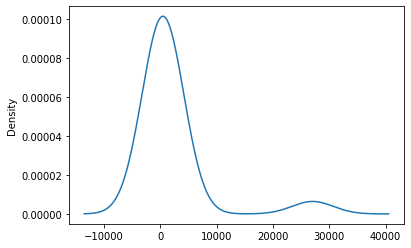

In [278]:
#Deliverable 1.5
# Visualize the value counts of APPLICATION_TYPE
#From 19.3.3 Practice Encoding Categorical Variables

#Pre Density Plot APPLICATION TYPE
APP_TYPE.plot.density()

In [279]:
# Determine which values to replace if counts are less than ...?
#19.3.3 Practice Encoding Categorical Variables
# Determine which values to replace
replace_application = list(APP_TYPE[APP_TYPE < 500].index)

# Replace in dataframe
for app in replace_application:
    app_modify_df.APPLICATION_TYPE = app_modify_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
app_modify_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

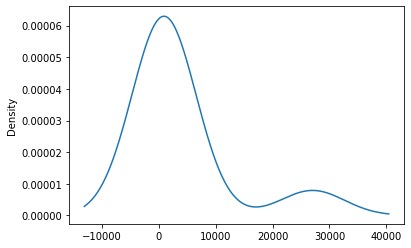

In [280]:
#Post Density Plot APPLICATION TYPE
APP_TYPE = app_modify_df.APPLICATION_TYPE.value_counts()
APP_TYPE.plot.density()

In [281]:
#Deliverable 1.4
# Look at CLASSIFICATION value counts for binning
CLASS = app_modify_df.CLASSIFICATION.value_counts()
print(CLASS)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4200        1
C1370        1
C1580        1
C2561        1
C2190        1
Name: CLASSIFICATION, Length: 71, dtype: int64


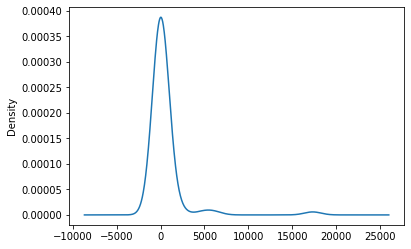

In [282]:
#Deliverable 1.5
# Visualize the value counts of CLASSIFICATION
#From 19.3.3 Practice Encoding Categorical Variables

#Pre Density Plot CLASSIFICATION
CLASS.plot.density()

In [283]:
# Determine which values to replace if counts are less than ..?
#19.3.3 Practice Encoding Categorical Variables
# Determine which values to replace
replace_class = list(CLASS[CLASS < 1000].index)

# Replace in dataframe
for cls in replace_class:
    app_modify_df.CLASSIFICATION = app_modify_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
app_modify_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

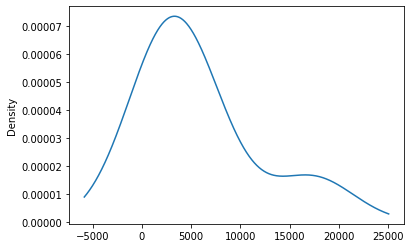

In [284]:
#Post Density Plot CLASSIFICATION
CLASS = app_modify_df.CLASSIFICATION.value_counts()
CLASS.plot.density()

In [285]:
#Deliverable 1.7
# Generate our categorical variable lists
application_cat = app_modify_df.dtypes[app_modify_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [286]:
#Deliverable 1.8
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(app_modify_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [287]:
# Merge one-hot encoded features and drop the originals
app_merge_df = app_modify_df.merge(encode_df,left_index=True, right_index=True)
app_merge_df = app_merge_df.drop(application_cat,1)
app_merge_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [288]:
# Split our preprocessed data into our features and target arrays
x = app_merge_df.drop(columns="IS_SUCCESSFUL").values
y = app_merge_df.IS_SUCCESSFUL.values

# Split the preprocessed data into a training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, stratify=y)

In [289]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
x_scaler = scaler.fit(x_train)

# Scale the data
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

In [290]:
len(x_train_scaled[0])

43

Set number of hidden node ~ 2 x number of features.
2 x 43 = 86

https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/

https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw#:~:text=The%20number%20of%20hidden%20neurons,size%20of%20the%20input%20layer.

### Deliverable 2: Compile, Train and Evaluate the Model

In [291]:
#Deliverable 2.2, 2.3, 2.4, 2.5, 2.6
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(x_train_scaled[0])
hidden_nodes_layer1 = 86
hidden_nodes_layer2 = 43

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 86)                3784      
_________________________________________________________________
dense_10 (Dense)             (None, 43)                3741      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 44        
Total params: 7,569
Trainable params: 7,569
Non-trainable params: 0
_________________________________________________________________


In [292]:
#Deliverable 2.7
# Compile the model
#19.5.3 Support Vector Machine Vs. Deep Learning Model
# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [293]:
#Deliverable 2.8
#19.6.1 Checkpoints Are Not Just for Video Games

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

In [294]:
#Deliverable 2.7
# Train the model
fit_model = nn.fit(x_train_scaled, y_train, epochs=50,callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 0s 455us/step - loss: 0.5702 - accuracy: 0.7242
Epoch 2/50
115/804 [===>..........................] - ETA: 0s - loss: 0.5560 - accuracy: 0.7272
Epoch 00002: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 0s 463us/step - loss: 0.5555 - accuracy: 0.7303
Epoch 3/50
343/804 [===========>..................] - ETA: 0s - loss: 0.5517 - accuracy: 0.7318
Epoch 00003: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 0s 453us/step - loss: 0.5527 - accuracy: 0.7318
Epoch 4/50
515/804 [==================>...........] - ETA: 0s - loss: 0.5483 - accuracy: 0.7375
Epoch 00004: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 0s 485us/step - loss: 0.5510 - accuracy: 0.7350
Epoch 5/50
690/804 [========================>.....] - ETA: 0s - loss: 0.5499 - accuracy: 0.7324
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [====

229/804 [=======>......................] - ETA: 0s - loss: 0.5393 - accuracy: 0.7406
Epoch 00038: saving model to checkpoints\weights.38.hdf5
804/804 [==============================] - 0s 454us/step - loss: 0.5386 - accuracy: 0.7403
Epoch 39/50
345/804 [===========>..................] - ETA: 0s - loss: 0.5354 - accuracy: 0.7408
Epoch 00039: saving model to checkpoints\weights.39.hdf5
804/804 [==============================] - 0s 453us/step - loss: 0.5376 - accuracy: 0.7400
Epoch 40/50
575/804 [====================>.........] - ETA: 0s - loss: 0.5379 - accuracy: 0.7374
Epoch 00040: saving model to checkpoints\weights.40.hdf5
804/804 [==============================] - 0s 456us/step - loss: 0.5382 - accuracy: 0.7380
Epoch 41/50
804/804 [==============================] - 0s 473us/step - loss: 0.5382 - accuracy: 0.7395
Epoch 42/50
  1/804 [..............................] - ETA: 0s - loss: 0.4814 - accuracy: 0.8438
Epoch 00042: saving model to checkpoints\weights.42.hdf5
804/804 [===========

In [252]:
#Deliverable 2.9
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(x_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5563 - accuracy: 0.7226
Loss: 0.5563138127326965, Accuracy: 0.7225655913352966


In [295]:
#Deliverable 2.10
#Save and export your results to an HDF5 file, and name it "AlphabetSoupCharity.h5"
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

# Deliverable 3: Optimize the Model (20 points)

Optimize your model in order to achieve a target predictive accuracy higher than 75% by using any or all of the following:

* Adjusting the input data to ensure that there are no variables or outliers that are causing confusion in the model, such as:
    * Dropping more or fewer columns.
    * Creating more bins for rare occurrences in columns.
    * Increasing or decreasing the number of values for each bin.
* Adding more neurons to a hidden layer.
* Adding more hidden layers.
* Using different activation functions for the hidden layers.
* Adding or reducing the number of epochs to the training regimen.

In [300]:
# Attempt 1
# Increase epochs from 50 to 100
fit_model_attempt1 = nn.fit(x_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 0s 444us/step - loss: 0.5247 - accuracy: 0.7458
Epoch 2/100
804/804 [==============================] - 0s 440us/step - loss: 0.5247 - accuracy: 0.7462
Epoch 3/100
804/804 [==============================] - 0s 440us/step - loss: 0.5251 - accuracy: 0.7452
Epoch 4/100
804/804 [==============================] - 0s 442us/step - loss: 0.5251 - accuracy: 0.7456
Epoch 5/100
804/804 [==============================] - 0s 442us/step - loss: 0.5253 - accuracy: 0.7457
Epoch 6/100
804/804 [==============================] - 0s 443us/step - loss: 0.5261 - accuracy: 0.7457
Epoch 7/100
804/804 [==============================] - 0s 450us/step - loss: 0.5256 - accuracy: 0.7461
Epoch 8/100
804/804 [==============================] - 0s 445us/step - loss: 0.5253 - accuracy: 0.7453
Epoch 9/100
804/804 [==============================] - 0s 442us/step - loss: 0.5255 - accuracy: 0.7450
Epoch 10/100
804/804 [==============================] - 0s 444us/step - l

804/804 [==============================] - 0s 448us/step - loss: 0.5250 - accuracy: 0.7459
Epoch 80/100
804/804 [==============================] - 0s 448us/step - loss: 0.5251 - accuracy: 0.7453
Epoch 81/100
804/804 [==============================] - 0s 448us/step - loss: 0.5251 - accuracy: 0.7462
Epoch 82/100
804/804 [==============================] - 0s 455us/step - loss: 0.5254 - accuracy: 0.7459
Epoch 83/100
804/804 [==============================] - 0s 447us/step - loss: 0.5252 - accuracy: 0.7456
Epoch 84/100
804/804 [==============================] - 0s 448us/step - loss: 0.5251 - accuracy: 0.7462
Epoch 85/100
804/804 [==============================] - 0s 445us/step - loss: 0.5255 - accuracy: 0.7458
Epoch 86/100
804/804 [==============================] - 0s 452us/step - loss: 0.5255 - accuracy: 0.7461
Epoch 87/100
804/804 [==============================] - 0s 449us/step - loss: 0.5257 - accuracy: 0.7462
Epoch 88/100
804/804 [==============================] - 0s 447us/step - loss:

In [301]:
# Attempt 1
# Evaluate the model
model_loss, model_accuracy = nn.evaluate(x_test_scaled,y_test,verbose=2)
print("Attempt 1")
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7391 - accuracy: 0.7256
Attempt 1
Loss: 0.739080011844635, Accuracy: 0.7255976796150208


Accuracy

Original: 0.7225655913352966

Attempt 1 (Epoch = 100):  0.7255976796150208

In [302]:
# Attempt 2
# Double number of nodes in hidden layers
    # hidden_nodes_layer1 from 86 to 172
    # hidden_nodes_layer2 from 43 to 86
# maintain epoch = 100

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(x_train_scaled[0])
hidden_nodes_layer1 = 172
hidden_nodes_layer2 = 86

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 172)               7568      
_________________________________________________________________
dense_13 (Dense)             (None, 86)                14878     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 87        
Total params: 22,533
Trainable params: 22,533
Non-trainable params: 0
_________________________________________________________________


In [303]:
# Attempt 2
# Double number of nodes in hidden layers
# hidden_nodes_layer1 from 86 to 172
# hidden_nodes_layer2 from 43 to 86
# maintain epoch = 100

# Compile
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [304]:
# Attempt 2
# Double number of nodes in hidden layers
# hidden_nodes_layer1 from 86 to 172
# hidden_nodes_layer2 from 43 to 86
# maintain epoch = 100

fit_model_attempt2 = nn.fit(x_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 0s 515us/step - loss: 0.5677 - accuracy: 0.7239
Epoch 2/100
804/804 [==============================] - 0s 510us/step - loss: 0.5546 - accuracy: 0.7306
Epoch 3/100
804/804 [==============================] - 0s 515us/step - loss: 0.5515 - accuracy: 0.7322
Epoch 4/100
804/804 [==============================] - 0s 527us/step - loss: 0.5500 - accuracy: 0.7335
Epoch 5/100
804/804 [==============================] - 0s 547us/step - loss: 0.5489 - accuracy: 0.7346
Epoch 6/100
804/804 [==============================] - 0s 511us/step - loss: 0.5482 - accuracy: 0.7344
Epoch 7/100
804/804 [==============================] - 0s 512us/step - loss: 0.5477 - accuracy: 0.7352
Epoch 8/100
804/804 [==============================] - 0s 507us/step - loss: 0.5468 - accuracy: 0.7348
Epoch 9/100
804/804 [==============================] - 0s 507us/step - loss: 0.5461 - accuracy: 0.7361
Epoch 10/100
804/804 [==============================] - 0s 510us/step - l

804/804 [==============================] - 0s 517us/step - loss: 0.5343 - accuracy: 0.7408
Epoch 80/100
804/804 [==============================] - 0s 516us/step - loss: 0.5342 - accuracy: 0.7417
Epoch 81/100
804/804 [==============================] - 0s 545us/step - loss: 0.5338 - accuracy: 0.7413
Epoch 82/100
804/804 [==============================] - 0s 535us/step - loss: 0.5337 - accuracy: 0.7423
Epoch 83/100
804/804 [==============================] - 0s 526us/step - loss: 0.5343 - accuracy: 0.7416
Epoch 84/100
804/804 [==============================] - 0s 520us/step - loss: 0.5341 - accuracy: 0.7414
Epoch 85/100
804/804 [==============================] - 0s 516us/step - loss: 0.5345 - accuracy: 0.7412
Epoch 86/100
804/804 [==============================] - 0s 517us/step - loss: 0.5337 - accuracy: 0.7406
Epoch 87/100
804/804 [==============================] - 0s 520us/step - loss: 0.5334 - accuracy: 0.7416
Epoch 88/100
804/804 [==============================] - 0s 517us/step - loss:

In [305]:
# Attempt 2
# Evaluate the model
model_loss, model_accuracy = nn.evaluate(x_test_scaled,y_test,verbose=2)
print("Attempt 2")
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5725 - accuracy: 0.7259
Attempt 2
Loss: 0.5725187063217163, Accuracy: 0.7259474992752075


Accuracy

Original: 0.7225655913352966

Attempt 1 (Epoch = 100):  0.7255976796150208
    
Attempt 2 (Epoch = 100, Double hidden layers):  0.7259474992752075

In [307]:
# Attempt 3
# Add 3rd hidden layer
# Double number of nodes in hidden layers
    # hidden_nodes_layer1 from 86 to 172
    # hidden_nodes_layer2 from 43 to 86
# maintain epoch = 100

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(x_train_scaled[0])
hidden_nodes_layer1 = 172
hidden_nodes_layer2 = 86
hidden_nodes_layer3 = 43

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 172)               7568      
_________________________________________________________________
dense_16 (Dense)             (None, 86)                14878     
_________________________________________________________________
dense_17 (Dense)             (None, 43)                3741      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 44        
Total params: 26,231
Trainable params: 26,231
Non-trainable params: 0
_________________________________________________________________


In [308]:
# Attempt 3
# Add 3rd hidden layer
# Double number of nodes in hidden layers
    # hidden_nodes_layer1 from 86 to 172
    # hidden_nodes_layer2 from 43 to 86
# maintain epoch = 100

# Compile
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [309]:
# Attempt 3
# Add 3rd hidden layer
# Double number of nodes in hidden layers
    # hidden_nodes_layer1 from 86 to 172
    # hidden_nodes_layer2 from 43 to 86
# maintain epoch = 100

fit_model_attempt3 = nn.fit(x_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 0s 535us/step - loss: 0.5665 - accuracy: 0.7261
Epoch 2/100
804/804 [==============================] - 0s 542us/step - loss: 0.5545 - accuracy: 0.7322
Epoch 3/100
804/804 [==============================] - 0s 532us/step - loss: 0.5516 - accuracy: 0.7325
Epoch 4/100
804/804 [==============================] - 0s 531us/step - loss: 0.5498 - accuracy: 0.7324
Epoch 5/100
804/804 [==============================] - 0s 535us/step - loss: 0.5491 - accuracy: 0.7340
Epoch 6/100
804/804 [==============================] - 0s 528us/step - loss: 0.5478 - accuracy: 0.7353
Epoch 7/100
804/804 [==============================] - 0s 527us/step - loss: 0.5467 - accuracy: 0.7350
Epoch 8/100
804/804 [==============================] - 0s 532us/step - loss: 0.5461 - accuracy: 0.7360
Epoch 9/100
804/804 [==============================] - 0s 530us/step - loss: 0.5452 - accuracy: 0.7368
Epoch 10/100
804/804 [==============================] - 0s 531us/step - l

804/804 [==============================] - 0s 546us/step - loss: 0.5347 - accuracy: 0.7416
Epoch 79/100
804/804 [==============================] - 0s 547us/step - loss: 0.5341 - accuracy: 0.7421
Epoch 80/100
804/804 [==============================] - 0s 542us/step - loss: 0.5329 - accuracy: 0.7418
Epoch 81/100
804/804 [==============================] - 0s 542us/step - loss: 0.5331 - accuracy: 0.7411
Epoch 82/100
804/804 [==============================] - 0s 548us/step - loss: 0.5329 - accuracy: 0.7416
Epoch 83/100
804/804 [==============================] - 0s 545us/step - loss: 0.5331 - accuracy: 0.7417
Epoch 84/100
804/804 [==============================] - ETA: 0s - loss: 0.5336 - accuracy: 0.74 - 0s 537us/step - loss: 0.5329 - accuracy: 0.7420
Epoch 85/100
804/804 [==============================] - 0s 542us/step - loss: 0.5336 - accuracy: 0.7423
Epoch 86/100
804/804 [==============================] - 0s 546us/step - loss: 0.5329 - accuracy: 0.7418
Epoch 87/100
804/804 [=============

In [310]:
# Attempt 3
# Add 3rd hidden layer
# Double number of nodes in hidden layers
    # hidden_nodes_layer1 from 86 to 172
    # hidden_nodes_layer2 from 43 to 86
# maintain epoch = 100

# Evaluate the model
model_loss, model_accuracy = nn.evaluate(x_test_scaled,y_test,verbose=2)
print("Attempt 3")
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5920 - accuracy: 0.7247
Attempt 2
Loss: 0.5920268297195435, Accuracy: 0.7246647477149963


Accuracy

Original: 0.7225655913352966

Attempt 1 
    (Epoch = 100):  
        0.7255976796150208
    
Attempt 2 
    (Epoch = 100, Double hidden layers):  
        0.7259474992752075
    
Attempt 3 
    (Epoch = 100, Double hidden layers, Add 3rd hidden layers):
        0.7246647477149963

In [311]:
# Attempt 4
# Change activation function from relu to swish
# Add 3rd hidden layer
# Double number of nodes in hidden layers
    # hidden_nodes_layer1 from 86 to 172
    # hidden_nodes_layer2 from 43 to 86
# maintain epoch = 100

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(x_train_scaled[0])
hidden_nodes_layer1 = 172
hidden_nodes_layer2 = 86
hidden_nodes_layer3 = 43

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="swish"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="swish"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="swish"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 172)               7568      
_________________________________________________________________
dense_20 (Dense)             (None, 86)                14878     
_________________________________________________________________
dense_21 (Dense)             (None, 43)                3741      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 44        
Total params: 26,231
Trainable params: 26,231
Non-trainable params: 0
_________________________________________________________________


In [312]:
# Attempt 4
# Change activation function from relu to swish
# Add 3rd hidden layer
# Double number of nodes in hidden layers
    # hidden_nodes_layer1 from 86 to 172
    # hidden_nodes_layer2 from 43 to 86
# maintain epoch = 100

# Compile
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [313]:
# Attempt 4
# Change activation function from relu to swish
# Add 3rd hidden layer
# Double number of nodes in hidden layers
    # hidden_nodes_layer1 from 86 to 172
    # hidden_nodes_layer2 from 43 to 86
# maintain epoch = 100

fit_model_attempt4 = nn.fit(x_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 0s 561us/step - loss: 0.5686 - accuracy: 0.7230
Epoch 2/100
804/804 [==============================] - 0s 556us/step - loss: 0.5550 - accuracy: 0.7313
Epoch 3/100
804/804 [==============================] - 0s 558us/step - loss: 0.5523 - accuracy: 0.7308
Epoch 4/100
804/804 [==============================] - 0s 552us/step - loss: 0.5503 - accuracy: 0.7328
Epoch 5/100
804/804 [==============================] - 0s 553us/step - loss: 0.5494 - accuracy: 0.7339
Epoch 6/100
804/804 [==============================] - 0s 554us/step - loss: 0.5485 - accuracy: 0.7341
Epoch 7/100
804/804 [==============================] - 0s 556us/step - loss: 0.5477 - accuracy: 0.7337
Epoch 8/100
804/804 [==============================] - 0s 554us/step - loss: 0.5470 - accuracy: 0.7343
Epoch 9/100
804/804 [==============================] - 0s 562us/step - loss: 0.5459 - accuracy: 0.7357
Epoch 10/100
804/804 [==============================] - 0s 554us/step - l

804/804 [==============================] - 0s 573us/step - loss: 0.5333 - accuracy: 0.7408
Epoch 80/100
804/804 [==============================] - 0s 571us/step - loss: 0.5327 - accuracy: 0.7416
Epoch 81/100
804/804 [==============================] - 0s 573us/step - loss: 0.5329 - accuracy: 0.7417
Epoch 82/100
804/804 [==============================] - 0s 576us/step - loss: 0.5326 - accuracy: 0.7418
Epoch 83/100
804/804 [==============================] - 0s 573us/step - loss: 0.5340 - accuracy: 0.7417
Epoch 84/100
804/804 [==============================] - 0s 576us/step - loss: 0.5326 - accuracy: 0.7419
Epoch 85/100
804/804 [==============================] - 0s 603us/step - loss: 0.5324 - accuracy: 0.7428
Epoch 86/100
804/804 [==============================] - 0s 577us/step - loss: 0.5328 - accuracy: 0.7416
Epoch 87/100
804/804 [==============================] - 0s 567us/step - loss: 0.5327 - accuracy: 0.7417
Epoch 88/100
804/804 [==============================] - 0s 567us/step - loss:

In [314]:
# Attempt 4
# Change activation function from relu to swish
# Add 3rd hidden layer
# Double number of nodes in hidden layers
    # hidden_nodes_layer1 from 86 to 172
    # hidden_nodes_layer2 from 43 to 86
# maintain epoch = 100

# Evaluate the model
model_loss, model_accuracy = nn.evaluate(x_test_scaled,y_test,verbose=2)
print("Attempt 4")
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5773 - accuracy: 0.7257
Attempt 4
Loss: 0.5773299932479858, Accuracy: 0.7257142663002014


Accuracy

Original: 0.7225655913352966

Attempt 1 
    * (Epoch = 100):  
        * 0.7255976796150208
    
Attempt 2 
    * (Epoch = 100, Double hidden layers):  
        * 0.7259474992752075
    
Attempt 3 
    * (Epoch = 100, Double hidden layers, Add 3rd hidden layers):
        * 0.7246647477149963
        
Attempt 4
    *  (Epoch = 100, Double hidden layers, Add 3rd hidden layers, Change activation from relu to swish):
        * 0.7257142663002014

In [315]:
# Define the checkpoint path and filenames
os.makedirs("modified_checkpoints/",exist_ok=True)
checkpoint_path = "modified_checkpoints/final_weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

In [316]:
fit_model_final = nn.fit(x_train_scaled, y_train, epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 0s 572us/step - loss: 0.5318 - accuracy: 0.7421
Epoch 2/100
181/804 [=====>........................] - ETA: 0s - loss: 0.5294 - accuracy: 0.7405
Epoch 00002: saving model to modified_checkpoints\final_weights.02.hdf5
804/804 [==============================] - 0s 574us/step - loss: 0.5317 - accuracy: 0.7423
Epoch 3/100
363/804 [============>.................] - ETA: 0s - loss: 0.5296 - accuracy: 0.7429
Epoch 00003: saving model to modified_checkpoints\final_weights.03.hdf5
804/804 [==============================] - 0s 614us/step - loss: 0.5318 - accuracy: 0.7420
Epoch 4/100
531/804 [==================>...........] - ETA: 0s - loss: 0.5300 - accuracy: 0.7432
Epoch 00004: saving model to modified_checkpoints\final_weights.04.hdf5
804/804 [==============================] - 0s 587us/step - loss: 0.5315 - accuracy: 0.7418
Epoch 5/100
720/804 [=========================>....] - ETA: 0s - loss: 0.5342 - accuracy: 0.7421
Epoch 00005: saving 

  1/804 [..............................] - ETA: 0s - loss: 0.4379 - accuracy: 0.7812
Epoch 00037: saving model to modified_checkpoints\final_weights.37.hdf5
804/804 [==============================] - 0s 582us/step - loss: 0.5313 - accuracy: 0.7433
Epoch 38/100
209/804 [======>.......................] - ETA: 0s - loss: 0.5278 - accuracy: 0.7478
Epoch 00038: saving model to modified_checkpoints\final_weights.38.hdf5
804/804 [==============================] - 1s 636us/step - loss: 0.5309 - accuracy: 0.7423
Epoch 39/100
358/804 [============>.................] - ETA: 0s - loss: 0.5296 - accuracy: 0.7431
Epoch 00039: saving model to modified_checkpoints\final_weights.39.hdf5
804/804 [==============================] - 0s 578us/step - loss: 0.5307 - accuracy: 0.7422
Epoch 40/100
613/804 [=====================>........] - ETA: 0s - loss: 0.5310 - accuracy: 0.7427
Epoch 00040: saving model to modified_checkpoints\final_weights.40.hdf5
804/804 [==============================] - 0s 593us/step - l

804/804 [==============================] - 0s 618us/step - loss: 0.5299 - accuracy: 0.7428
Epoch 73/100
 89/804 [==>...........................] - ETA: 0s - loss: 0.5348 - accuracy: 0.7412
Epoch 00073: saving model to modified_checkpoints\final_weights.73.hdf5
804/804 [==============================] - 0s 589us/step - loss: 0.5300 - accuracy: 0.7429
Epoch 74/100
265/804 [========>.....................] - ETA: 0s - loss: 0.5278 - accuracy: 0.7439
Epoch 00074: saving model to modified_checkpoints\final_weights.74.hdf5
804/804 [==============================] - 0s 587us/step - loss: 0.5297 - accuracy: 0.7430
Epoch 75/100
477/804 [================>.............] - ETA: 0s - loss: 0.5326 - accuracy: 0.7404
Epoch 00075: saving model to modified_checkpoints\final_weights.75.hdf5
804/804 [==============================] - 1s 636us/step - loss: 0.5297 - accuracy: 0.7427
Epoch 76/100
693/804 [========================>.....] - ETA: 0s - loss: 0.5299 - accuracy: 0.7424
Epoch 00076: saving model to

In [317]:
# Evaluate the model
model_loss, model_accuracy = nn.evaluate(x_test_scaled,y_test,verbose=2)
print("Attempt 4")
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6047 - accuracy: 0.7254
Attempt 4
Loss: 0.6047123670578003, Accuracy: 0.7253644466400146


In [318]:
#Save and export your results to an HDF5 file, and name it "AlphabetSoupCharity.h5"
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_final.h5")